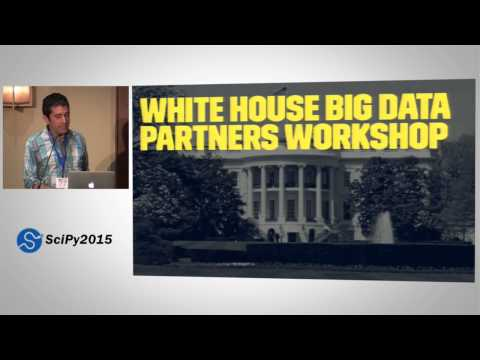

In [4]:
#!/usr/bin/env python

from IPython.display import YouTubeVideo

YouTubeVideo("TGGGDpb04Yc")

In [1]:
# So notebook will show plot in browser
%matplotlib inline

# Import the necessary modules.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# p is probability of success in the binomial distribution
p = 0.05
sample_sizes = [10, 100, 1000, 10000, 100000]
replicates = 1000
# List container for total biases.
biases = []

# Section
True sample here is just a standard normal distrubution.
Negative values is a boolean array with True being elements that are less than zero.
Missing is an array based on a binomial distribution made "astype" boolean.
Observed sample is indexed based on non-negative values and values that aren't missing.

In [3]:
for n in sample_sizes:

    bias = np.empty(replicates)
    for i in range(replicates):

        true_sample = np.random.normal(size=n)
        negative_values = true_sample<0
        # One trial
        missing = np.random.binomial(1, p, n).astype(bool)
        observed_sample = true_sample[~(negative_values & missing)]
        
        # Without bias.
        #observed_sample = true_sample

        bias[i] = observed_sample.mean()

    biases.append(bias)

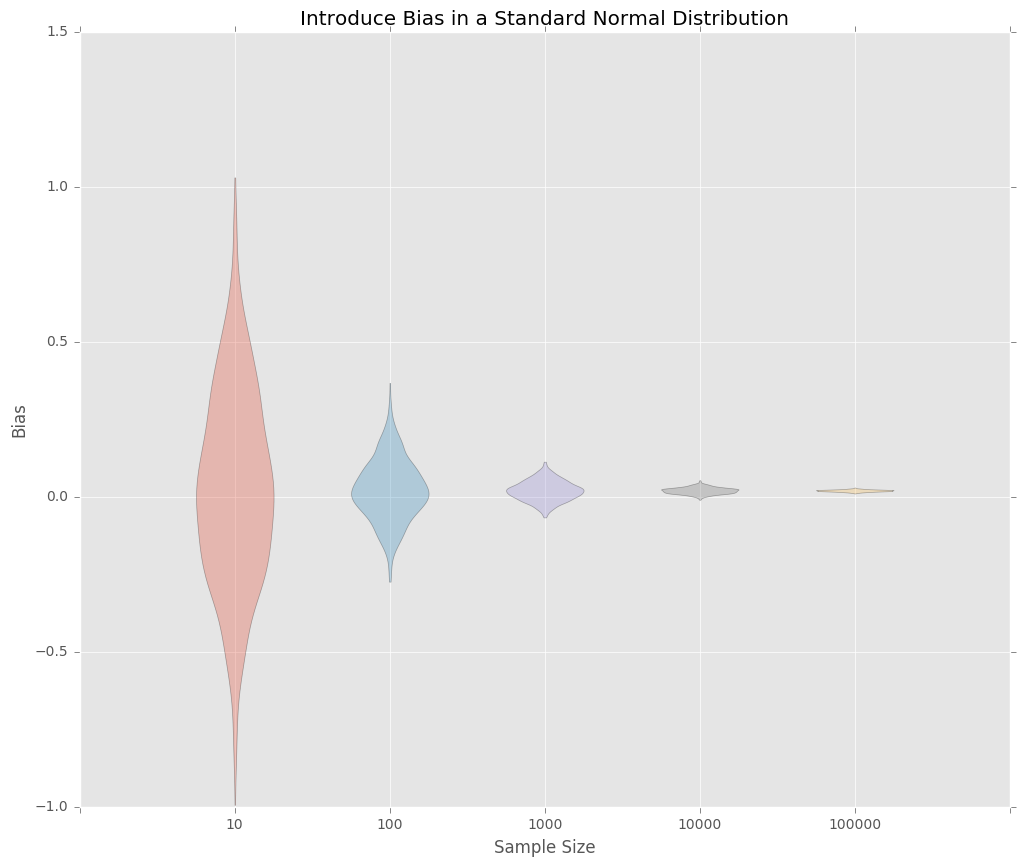

In [4]:
# Select a style sheet for plot.
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(12,10) ) 


# Create object "violins". This is so we can change the color in the loop.
violins = ax.violinplot(biases, showmeans=False, showextrema=False, showmedians=False)
for i, pc in enumerate(violins['bodies']):
    # Grab the color in the cycle "color". This is a change in Python3.5.
    color = list(plt.rcParams['axes.prop_cycle'])[i]['color']
    pc.set_facecolor(color)
    pc.set_edgecolor('k')

# Label the first bin an empty string to it skips the origin.
sample_sizes.insert(0,'')
ax.set_xticklabels(sample_sizes)

ax.set_title( 'Introduce Bias in a Standard Normal Distribution' )
ax.set_ylabel( 'Bias' )
ax.set_xlabel( 'Sample Size' )
plt.show()